# Vanilla Gradient Descent

implementation of gradient descent using only numpy

Notes:

<a href>http://cs229.stanford.edu/notes/cs229-notes1.pdf</a>

In [1]:
import numpy as np
import asyncio

In [2]:
import functools

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
dataset = {
    'size_in_feet': [
        2104,
        1416,
        1534,
        852,
        2506
    ],
    'price':[
        460,
        232,
        315,
        178,
        500
    ]
}

In [5]:
#linear function => h(x) = Theta
def linearfunction(t0, t1, x):
    linear = np.add(np.multiply(t1, x), t0)
    return linear

In [6]:
def LRM(t0, t1, xArray, yArray):
    mapped_LRM = list(map(lambda x,y: np.square(np.subtract(linearfunction(t0, t1, x),y)) , xArray, yArray))
    linear_regression_LRM = functools.reduce(lambda x,y: x+y, mapped_LRM)
    regression = np.divide(linear_regression_LRM, np.multiply(len(xArray), 2))
    
    return regression

In [7]:
#Gradient Descent
# *params:
# theta_zero => cost variable to be minimized
# theta_one => cost variable to be minimized
# learning_rate => learning rate of the gradient descent
# xArray => Array that holds the x dataset
# yArray => Array that holds the y dataset

def gradientdescent(learning_rate, xArray, yArray, theta_zero, theta_one):
    if len(xArray)!=len(yArray): return "The Arrays are not equal"     
    
    mapped_t0 = list(map(lambda x,y: np.subtract(linearfunction(theta_zero, theta_one, x),y) , xArray, yArray))
    linear_regression_t0 = functools.reduce(lambda x,y: x+y, mapped_t0)
                      
    derLRM_t0= np.divide(linear_regression_t0, len(xArray))
#     derLRM_t0 = linear_regression_t0
        
    gradient_t0 = np.subtract(theta_zero, np.multiply(learning_rate, derLRM_t0))

    mapped_t1 = list(map(lambda x,y: np.multiply(np.subtract(linearfunction(theta_zero, theta_one, x),y), x) , xArray, yArray))
    linear_regression_t1 = functools.reduce(lambda x,y: x+y, mapped_t1)
                      
    derLRM_t1 = np.divide(linear_regression_t1, len(xArray))
#     derLRM_t1 = linear_regression_t1
        
    gradient_t1 = np.subtract(theta_one, np.multiply(learning_rate, derLRM_t1))
    
    return [gradient_t0, gradient_t1]
                      

In [12]:
gradient_descent_values = {
    'gradients':{
        'theta_zero': [0],
        'theta_one': [0]
    },
    'linear_regression': []
}

In [13]:
learning_rate = 0.0001

In [14]:
for i in range(100):
    t_zero = gradient_descent_values['gradients']['theta_zero'][-1]
    t_one = gradient_descent_values['gradients']['theta_one'][-1]
    
    model = LRM(t_zero, t_one, dataset['size_in_feet'], dataset['price'])
    
    BGD = gradientdescent(learning_rate, dataset['size_in_feet'], dataset['price'], t_zero, t_one)
    
    gradient_descent_values['gradients']['theta_zero'].append(BGD[0])
    gradient_descent_values['gradients']['theta_one'].append(BGD[1])
    gradient_descent_values['linear_regression'].append(model)
    

/home/fjcamillo/anaconda2/envs/datascience/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  


In [15]:
gradient_descent_values

{'gradients': {'theta_one': [0,
   63.684359999999998,
   -19985.390766897599,
   6291853.4061723547,
   -1980797762.7557039,
   623593661549.03052,
   -196319413317232.97,
   61805169650854048.0,
   -1.9457469493341934e+19,
   6.1255898369514547e+21,
   -1.9284548210856878e+24,
   6.071150853971395e+26,
   -1.9113163704258662e+29,
   6.0171956779302244e+31,
   -1.8943302316002691e+34,
   5.9637200091672715e+36,
   -1.8774950509920913e+39,
   5.9107195862335565e+41,
   -1.8608094870143094e+44,
   5.8581901855521995e+46,
   -1.8442722100027755e+49,
   5.8061276210818473e+51,
   -1.8278819021102537e+54,
   5.7545277439830837e+56,
   -1.8116372572014035e+59,
   5.7033864422878199e+61,
   -1.7955369807486936e+64,
   5.6526996405716071e+66,
   -1.779579789729242e+69,
   5.6024632996288691e+71,
   -1.763764412522573e+74,
   5.5526734161510234e+76,
   -1.7480895888092804e+79,
   5.5033260224074494e+81,
   -1.7325540694705958e+84,
   5.4544171859293185e+86,
   -1.7171566164888465e+89,
   5.405

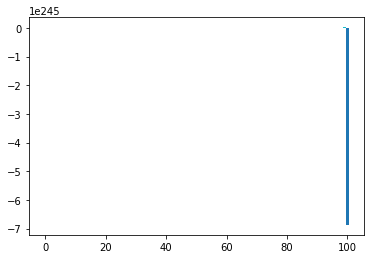

In [17]:
counter = 0
for i in range(len(gradient_descent_values['gradients']['theta_zero'])):
    plt.bar([counter], gradient_descent_values['gradients']['theta_zero'][i])
    counter += 1
plt.show()

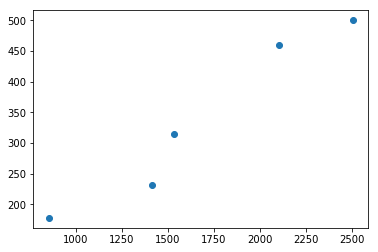

In [18]:
plt.scatter(dataset['size_in_feet'], dataset['price'])
plt.show()